### Exploratory Data Analysis (EDA) and Regression Analysis for Home and Away Teams for EPL 1993 - 2022 Seasons

In [57]:
#Importing Relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [58]:
#Loading data
home = pd.read_csv('home_teams.csv')
away = pd.read_csv('away_teams.csv')
display(home)

,Year,Month,Team,Goals_for_h,Goals_against_a,GPh,HW,HD,HL,HPTS,hwinvalue
0,1993,April,Arsenal,1,2,2,0,1,1,1,0.5
1,1993,April,Aston Villa,3,1,2,1,1,0,4,1.5
2,1993,April,Blackburn,9,2,3,3,0,0,9,3.0
3,1993,April,Chelsea,8,2,2,2,0,0,6,2.0
4,1993,April,Coventry City,2,1,2,1,0,1,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5959,2022,September,Southampton,0,1,2,0,1,1,1,0.5
5960,2022,September,Tottenham,0,3,1,0,0,1,0,0.0
5961,2022,September,Watford,1,3,2,0,1,1,1,0.5
5962,2022,September,West Ham,1,2,1,0,0,1,0,0.0


In [59]:
display(away)

,Year,Month,Team,Goals_against_h,Goals_for_a,GPa,AW,AD,AL,APTS,awinvalue
0,1993,April,Arsenal,2,2,2,1,0,1,3,1.0
1,1993,April,Aston Villa,3,2,3,2,0,1,6,2.0
2,1993,April,Blackburn,7,8,3,2,0,1,6,2.0
3,1993,April,Chelsea,5,1,3,0,1,2,1,0.5
4,1993,April,Coventry City,4,0,2,0,1,1,1,0.5
...,...,...,...,...,...,...,...,...,...,...,...
5974,2022,September,Southampton,0,0,1,0,1,0,1,0.5
5975,2022,September,Tottenham,6,1,2,0,0,2,0,0.0
5976,2022,September,Watford,1,3,1,1,0,0,3,1.0
5977,2022,September,West Ham,1,2,2,1,1,0,4,1.5


In [60]:
home.describe()

,Year,Goals_for_h,Goals_against_a,GPh,HW,HD,HL,HPTS,hwinvalue
count,5964.00000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000
mean,2007.35161,2.969651,2.226190,1.952716,0.894534,0.504695,0.553488,3.188296,1.146881
std,8.67970,2.240882,1.848526,0.741961,0.798147,0.641626,0.686461,2.258995,0.752527
min,1993.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.500000
50%,2007.00000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000
75%,2015.00000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.500000
max,2022.00000,16.000000,13.000000,5.000000,4.000000,4.000000,4.000000,13.000000,4.500000


In [61]:
away.describe()

,Year,Goals_against_h,Goals_for_a,GPa,AW,AD,AL,APTS,awinvalue
count,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000
mean,2007.348721,2.962201,2.220605,1.947817,0.552099,0.503429,0.892290,2.159726,0.803813
std,8.677851,2.164120,1.860653,0.744526,0.689563,0.648838,0.802163,2.024708,0.693235
min,1993.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,2.000000,1.000000
75%,2015.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000
max,2022.000000,15.000000,13.000000,5.000000,4.000000,3.000000,4.000000,12.000000,4.000000


In [62]:
home.corr()

,Year,Goals_for_h,Goals_against_a,GPh,HW,HD,HL,HPTS,hwinvalue
Year,1.000000,-0.018756,0.036861,-0.041479,-0.028440,-0.068065,0.051854,-0.049478,-0.059181
Goals_for_h,-0.018756,1.000000,0.159467,0.509205,0.734159,-0.065509,-0.242001,0.759572,0.750738
Goals_against_a,0.036861,0.159467,1.000000,0.472435,-0.218774,0.085425,0.685153,-0.207628,-0.195619
GPh,-0.041479,0.509205,0.472435,1.000000,0.420321,0.297076,0.314470,0.529901,0.572449
HW,-0.028440,0.734159,-0.218774,0.420321,1.000000,-0.339110,-0.391434,0.963641,0.916055
HD,-0.068065,-0.065509,0.085425,0.297076,-0.339110,1.000000,-0.219310,-0.075411,0.066647
HL,0.051854,-0.242001,0.685153,0.314470,-0.391434,-0.219310,1.000000,-0.477194,-0.508658
HPTS,-0.049478,0.759572,-0.207628,0.529901,0.963641,-0.075411,-0.477194,1.000000,0.989910
hwinvalue,-0.059181,0.750738,-0.195619,0.572449,0.916055,0.066647,-0.508658,0.989910,1.000000


In [63]:
away.corr()

,Year,Goals_against_h,Goals_for_a,GPa,AW,AD,AL,APTS,awinvalue
Year,1.000000,-0.018921,0.036934,-0.040370,0.051769,-0.066895,-0.027862,0.031456,0.020189
Goals_against_h,-0.018921,1.000000,0.136463,0.504174,-0.254819,-0.047441,0.725371,-0.275557,-0.275671
Goals_for_a,0.036934,0.136463,1.000000,0.445196,0.687586,0.084935,-0.246561,0.729740,0.723692
GPa,-0.040370,0.504174,0.445196,1.000000,0.308318,0.300596,0.419969,0.411344,0.447357
AW,0.051769,-0.254819,0.687586,0.308318,1.000000,-0.223887,-0.392372,0.949975,0.889929
AD,-0.066895,-0.047441,0.084935,0.300596,-0.223887,1.000000,-0.337403,0.091709,0.245277
AL,-0.027862,0.725371,-0.246561,0.419969,-0.392372,-0.337403,1.000000,-0.509019,-0.548191
APTS,0.031456,-0.275557,0.729740,0.411344,0.949975,0.091709,-0.509019,1.000000,0.987862
awinvalue,0.020189,-0.275671,0.723692,0.447357,0.889929,0.245277,-0.548191,0.987862,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

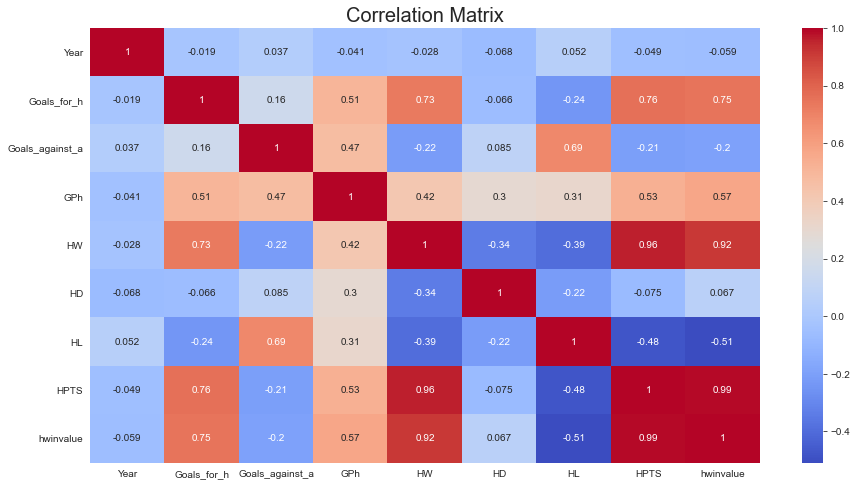

In [64]:
#Correlation for home teams
plt.figure(figsize=(15,8))
sns.heatmap(home.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix', fontsize=20)

Text(0.5, 1.0, 'Correlation Matrix')

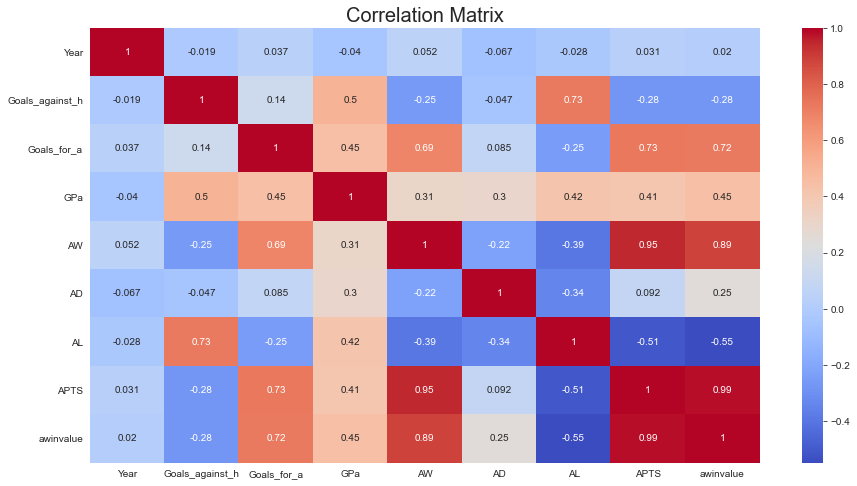

In [65]:
#Correlation for away teams
plt.figure(figsize=(15, 8))
sns.heatmap(away.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize = 20)

In [66]:
#Renaming Data columns for home team data
home = home.rename(columns = {"Goals_for_h": 'HomeGoals', 'Goals_against_a': 'AwayGoals', 'GPh':'GP', 'HW':'W',
                   'HD':'D', 'HL':'L', 'HPTS':'PTS', 'hwinvalue':'WV'})
home.head()

,Year,Month,Team,HomeGoals,AwayGoals,GP,W,D,L,PTS,WV
0,1993,April,Arsenal,1,2,2,0,1,1,1,0.5
1,1993,April,Aston Villa,3,1,2,1,1,0,4,1.5
2,1993,April,Blackburn,9,2,3,3,0,0,9,3.0
3,1993,April,Chelsea,8,2,2,2,0,0,6,2.0
4,1993,April,Coventry City,2,1,2,1,0,1,3,1.0


In [67]:
#Renaming data columns for away team data
away = away.rename(columns = {"Goals_for_a": 'AwayGoals', 'Goals_against_h': 'HomeGoals', 'GPa':'GP', 'AW':'W',
                   'AD':'D', 'AL':'L', 'APTS':'PTS', 'awinvalue':'WV'})
away.head()

,Year,Month,Team,HomeGoals,AwayGoals,GP,W,D,L,PTS,WV
0,1993,April,Arsenal,2,2,2,1,0,1,3,1.0
1,1993,April,Aston Villa,3,2,3,2,0,1,6,2.0
2,1993,April,Blackburn,7,8,3,2,0,1,6,2.0
3,1993,April,Chelsea,5,1,3,0,1,2,1,0.5
4,1993,April,Coventry City,4,0,2,0,1,1,1,0.5


In [68]:
#Data Aggregation for home and away team data
home = home.groupby(['Team'])['HomeGoals', 'AwayGoals', 'GP', 'W', 'D', 'L','PTS', 'WV'].sum().reset_index()
away = away.groupby(['Team'])['HomeGoals', 'AwayGoals', 'GP', 'W', 'D', 'L','PTS', 'WV'].sum().reset_index()
display(home[0:10])

,Team,HomeGoals,AwayGoals,GP,W,D,L,PTS,WV
0,Arsenal,1154,489,576,368,131,77,1235,433.5
1,Aston Villa,684,577,519,208,151,160,775,283.5
2,Barnsley,25,35,19,7,4,8,25,9.0
3,Birmingham City,162,140,133,50,46,37,196,73.0
4,Blackburn,545,381,348,169,85,94,592,211.5
5,Blackpool,30,37,19,5,5,9,20,7.5
6,Bolton,319,313,247,93,75,79,354,130.5
7,Bournemouth,136,148,95,34,25,36,127,46.5
8,Bradford City,46,58,38,10,15,13,45,17.5
9,Brentford,22,21,19,7,3,9,24,8.5


In [69]:
#Renaming some columns to more meaningful names
home = home.rename(columns = {'HomeGoals':'Goals_Scored', 'AwayGoals':'Goals_Conced'})
home.head(3)

,Team,Goals_Scored,Goals_Conced,GP,W,D,L,PTS,WV
0,Arsenal,1154,489,576,368,131,77,1235,433.5
1,Aston Villa,684,577,519,208,151,160,775,283.5
2,Barnsley,25,35,19,7,4,8,25,9.0


In [70]:
display(away[0:10])

,Team,HomeGoals,AwayGoals,GP,W,D,L,PTS,WV
0,Arsenal,659,863,576,251,153,172,906,327.5
1,Aston Villa,776,581,519,146,145,228,583,218.5
2,Barnsley,47,12,19,3,1,15,10,3.5
3,Birmingham City,220,111,133,23,36,74,105,41.0
4,Blackburn,526,382,348,93,99,156,378,142.5
5,Blackpool,41,25,19,5,4,10,19,7.0
6,Bolton,432,256,247,56,53,138,221,82.5
7,Bournemouth,182,105,95,22,18,55,84,31.0
8,Bradford City,80,22,38,4,5,29,17,6.5
9,Brentford,35,26,19,6,4,9,22,8.0


In [71]:
#Renaming some columns to more meaningful names
away = away.rename(columns = {'HomeGoals':'Goals_conced', 'AwayGoals': 'Goals_scored'})
away[0:3]

,Team,Goals_conced,Goals_scored,GP,W,D,L,PTS,WV
0,Arsenal,659,863,576,251,153,172,906,327.5
1,Aston Villa,776,581,519,146,145,228,583,218.5
2,Barnsley,47,12,19,3,1,15,10,3.5


In [72]:
#Selecting useful Data columns for analysis
away = away[['Team', 'Goals_scored', 'Goals_conced', 'GP', 'W', 'D', 'L', 'PTS','WV']]
away.head()

,Team,Goals_scored,Goals_conced,GP,W,D,L,PTS,WV
0,Arsenal,863,659,576,251,153,172,906,327.5
1,Aston Villa,581,776,519,146,145,228,583,218.5
2,Barnsley,12,47,19,3,1,15,10,3.5
3,Birmingham City,111,220,133,23,36,74,105,41.0
4,Blackburn,382,526,348,93,99,156,378,142.5


In [73]:
#Creating relevant variables
home['win_pct'] = home['W'] / home['GP']
home['pyth_win_pct'] = home['Goals_Scored'] ** 2 / (home['Goals_Scored'] ** 2 + home['Goals_Conced'] ** 2)
display(home[0:4])

,Team,Goals_Scored,Goals_Conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct
0,Arsenal,1154,489,576,368,131,77,1235,433.5,0.638889,0.847775
1,Aston Villa,684,577,519,208,151,160,775,283.5,0.400771,0.584247
2,Barnsley,25,35,19,7,4,8,25,9.0,0.368421,0.337838
3,Birmingham City,162,140,133,50,46,37,196,73.0,0.375940,0.572463


In [74]:
home.describe()

,Goals_Scored,Goals_Conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,354.220000,265.540000,232.920000,106.700000,60.200000,66.020000,380.300000,136.800000,0.392804,0.523632
std,346.970109,178.609163,183.459036,109.873071,44.003247,41.874687,369.878869,130.103962,0.105105,0.157409
min,22.000000,21.000000,19.000000,4.000000,3.000000,8.000000,19.000000,7.500000,0.190476,0.177335
25%,119.000000,130.250000,99.000000,35.000000,29.750000,36.250000,134.750000,49.875000,0.338077,0.410077
50%,208.500000,206.000000,155.000000,60.000000,46.000000,57.500000,223.000000,81.500000,0.376229,0.523056
75%,427.250000,378.500000,305.500000,128.750000,84.750000,93.750000,460.500000,166.625000,0.417914,0.574892
max,1214.000000,640.000000,576.000000,402.000000,154.000000,160.000000,1316.000000,457.000000,0.697917,0.889447


In [75]:
#Creating relevant variables
away['win_pct'] = away['W'] / away['GP']
away['pyth_win_pct'] = away['Goals_scored'] ** 2 / (away['Goals_scored'] ** 2 + away['Goals_conced'] ** 2)
display(away[0:4])

,Team,Goals_scored,Goals_conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct
0,Arsenal,863,659,576,251,153,172,906,327.5,0.435764,0.631669
1,Aston Villa,581,776,519,146,145,228,583,218.5,0.281310,0.359208
2,Barnsley,12,47,19,3,1,15,10,3.5,0.157895,0.061198
3,Birmingham City,111,220,133,23,36,74,105,41.0,0.172932,0.202912


In [76]:
#Identifying teams with more 260 home games played 
home['Long'] = ['Yes' if home.loc[ex, 'GP'] > 260 else 'No' 
                for ex in home.index]

In [77]:
# Identifying teams with more 260 home games played
away['Long'] = ['Yes' if away.loc[ex, 'GP'] > 260 else 'No'
                for ex in away.index]

In [78]:
#Goals Difference
home['Goals_diff'] = home['Goals_Scored'] - home['Goals_Conced']
away['Goals_diff'] = away['Goals_scored'] - away['Goals_conced']

In [79]:
#Summary Statistics
away.describe()

,Goals_scored,Goals_conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Goals_diff
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,265.540000,354.22000,232.920000,66.020000,60.200000,106.700000,258.260000,96.120000,0.232332,0.282765,-88.680000
std,260.731014,241.23122,183.459036,75.867363,49.186857,69.933569,272.522293,98.497465,0.092798,0.143392,123.266501
min,12.000000,35.00000,19.000000,1.000000,1.000000,9.000000,10.000000,3.500000,0.047619,0.061198,-290.000000
25%,96.750000,179.00000,99.000000,21.250000,24.500000,56.000000,90.500000,34.375000,0.169509,0.195311,-150.000000
50%,148.500000,270.50000,155.000000,35.000000,42.000000,83.500000,147.000000,56.250000,0.223887,0.261084,-95.500000
75%,371.750000,514.25000,305.500000,85.500000,89.500000,150.750000,328.000000,121.750000,0.262907,0.317644,-48.750000
max,971.000000,841.00000,576.000000,301.000000,166.000000,259.000000,1050.000000,374.500000,0.522569,0.698460,333.000000


Text(0.5, 1.0, 'Correlation Coffiecent Matrix For Home ')

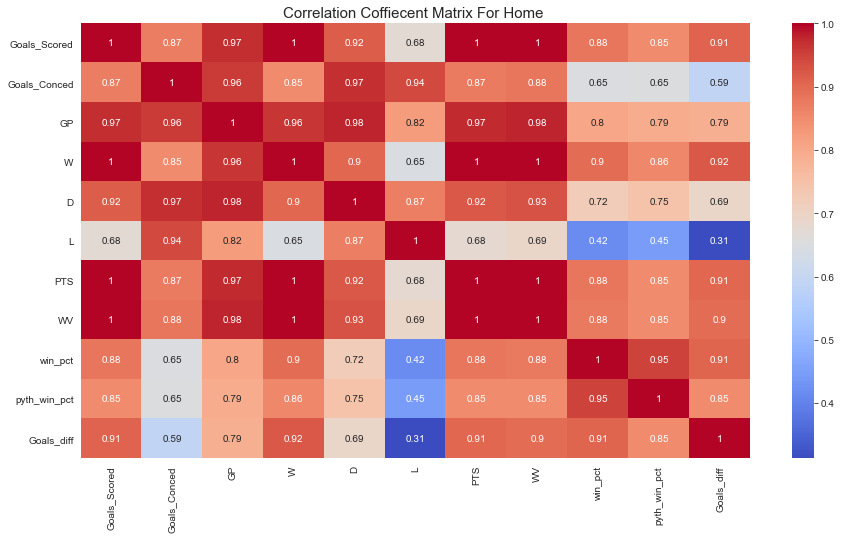

In [80]:
#Correlations
plt.figure(figsize = (15, 8))
sns.heatmap(home.corr(), cmap ='coolwarm', annot = True)
plt.title('Correlation Coffiecent Matrix For Home ', fontsize = 15)

Text(0, 0.5, 'Pythogorean Winning Percentage')

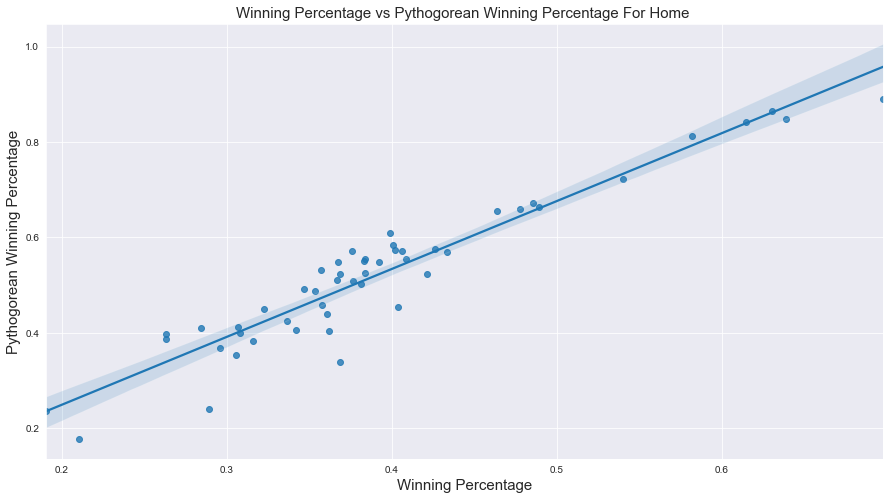

In [81]:
#Regression plot ofr win percentage vs pythogreon win percentage for home stats
plt.figure(figsize=(15, 8))
sns.regplot(x = 'win_pct', y = 'pyth_win_pct', data = home)
plt.title('Winning Percentage vs Pythogorean Winning Percentage For Home ', fontsize=15)
plt.xlabel('Winning Percentage', fontsize = 15)
plt.ylabel('Pythogorean Winning Percentage', fontsize = 15)

In [82]:
#Top 10 teams with most home wins
home.sort_values(by = ['W', 'GP'], ascending = [False, False]).head(10)

,Team,Goals_Scored,Goals_Conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
27,Manchester Utd,1214,428,576,402,110,64,1316,457.0,0.697917,0.889447,Yes,786
0,Arsenal,1154,489,576,368,131,77,1235,433.5,0.638889,0.847775,Yes,665
25,Liverpool,1156,458,576,363,137,76,1226,431.5,0.630208,0.864327,Yes,698
14,Chelsea,1121,485,576,354,143,79,1205,425.5,0.614583,0.842328,Yes,636
43,Tottenham,995,618,576,311,132,133,1065,377.0,0.539931,0.721619,Yes,377
26,Manchester City,957,458,481,280,97,104,937,328.5,0.582121,0.813645,Yes,499
18,Everton,881,640,576,267,154,155,955,344.0,0.463542,0.654568,Yes,241
29,Newcastle Utd,831,591,517,253,128,136,887,317.0,0.489362,0.664102,Yes,240
46,West Ham,730,635,498,216,124,158,772,278.0,0.433735,0.569262,Yes,95
1,Aston Villa,684,577,519,208,151,160,775,283.5,0.400771,0.584247,Yes,107


In [83]:
# Top 10 teams with most home Scored
home.sort_values(by=['Goals_Scored', 'GP'], ascending=[False, False]).head(10)

,Team,Goals_Scored,Goals_Conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
27,Manchester Utd,1214,428,576,402,110,64,1316,457.0,0.697917,0.889447,Yes,786
25,Liverpool,1156,458,576,363,137,76,1226,431.5,0.630208,0.864327,Yes,698
0,Arsenal,1154,489,576,368,131,77,1235,433.5,0.638889,0.847775,Yes,665
14,Chelsea,1121,485,576,354,143,79,1205,425.5,0.614583,0.842328,Yes,636
43,Tottenham,995,618,576,311,132,133,1065,377.0,0.539931,0.721619,Yes,377
26,Manchester City,957,458,481,280,97,104,937,328.5,0.582121,0.813645,Yes,499
18,Everton,881,640,576,267,154,155,955,344.0,0.463542,0.654568,Yes,241
29,Newcastle Utd,831,591,517,253,128,136,887,317.0,0.489362,0.664102,Yes,240
46,West Ham,730,635,498,216,124,158,772,278.0,0.433735,0.569262,Yes,95
1,Aston Villa,684,577,519,208,151,160,775,283.5,0.400771,0.584247,Yes,107


In [84]:
# Top 10 teams with most home conced
home.sort_values(by=['Goals_Conced', 'GP'], ascending=[False, False]).head(10)

,Team,Goals_Scored,Goals_Conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
18,Everton,881,640,576,267,154,155,955,344.0,0.463542,0.654568,Yes,241
46,West Ham,730,635,498,216,124,158,772,278.0,0.433735,0.569262,Yes,95
43,Tottenham,995,618,576,311,132,133,1065,377.0,0.539931,0.721619,Yes,377
29,Newcastle Utd,831,591,517,253,128,136,887,317.0,0.489362,0.664102,Yes,240
1,Aston Villa,684,577,519,208,151,160,775,283.5,0.400771,0.584247,Yes,107
38,Southampton,628,542,443,178,124,141,658,240.0,0.401806,0.573109,Yes,86
0,Arsenal,1154,489,576,368,131,77,1235,433.5,0.638889,0.847775,Yes,665
14,Chelsea,1121,485,576,354,143,79,1205,425.5,0.614583,0.842328,Yes,636
25,Liverpool,1156,458,576,363,137,76,1226,431.5,0.630208,0.864327,Yes,698
26,Manchester City,957,458,481,280,97,104,937,328.5,0.582121,0.813645,Yes,499


In [85]:
# Top 10 teams with most home loss
home.sort_values(by=['L', 'GP'], ascending=[False, False]).head(10)

,Team,Goals_Scored,Goals_Conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
1,Aston Villa,684,577,519,208,151,160,775,283.5,0.400771,0.584247,Yes,107
46,West Ham,730,635,498,216,124,158,772,278.0,0.433735,0.569262,Yes,95
18,Everton,881,640,576,267,154,155,955,344.0,0.463542,0.654568,Yes,241
38,Southampton,628,542,443,178,124,141,658,240.0,0.401806,0.573109,Yes,86
29,Newcastle Utd,831,591,517,253,128,136,887,317.0,0.489362,0.664102,Yes,240
43,Tottenham,995,618,576,311,132,133,1065,377.0,0.539931,0.721619,Yes,377
40,Sunderland,336,371,304,98,87,119,381,141.5,0.322368,0.450616,Yes,-35
16,Crystal Palace,271,323,251,77,64,110,295,109.0,0.306773,0.413124,No,-52
45,West Brom,295,361,247,76,66,105,294,109.0,0.307692,0.400398,No,-66
26,Manchester City,957,458,481,280,97,104,937,328.5,0.582121,0.813645,Yes,499


In [86]:
# Top 10 teams with most goals diff
home.sort_values(by=['Goals_diff', 'GP'], ascending=[False, False]).head(10)

,Team,Goals_Scored,Goals_Conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
27,Manchester Utd,1214,428,576,402,110,64,1316,457.0,0.697917,0.889447,Yes,786
25,Liverpool,1156,458,576,363,137,76,1226,431.5,0.630208,0.864327,Yes,698
0,Arsenal,1154,489,576,368,131,77,1235,433.5,0.638889,0.847775,Yes,665
14,Chelsea,1121,485,576,354,143,79,1205,425.5,0.614583,0.842328,Yes,636
26,Manchester City,957,458,481,280,97,104,937,328.5,0.582121,0.813645,Yes,499
43,Tottenham,995,618,576,311,132,133,1065,377.0,0.539931,0.721619,Yes,377
18,Everton,881,640,576,267,154,155,955,344.0,0.463542,0.654568,Yes,241
29,Newcastle Utd,831,591,517,253,128,136,887,317.0,0.489362,0.664102,Yes,240
4,Blackburn,545,381,348,169,85,94,592,211.5,0.485632,0.671720,Yes,164
23,Leeds United,404,290,272,130,71,71,461,165.5,0.477941,0.659949,Yes,114


In [87]:
# Top 10 teams with most home draws
home.sort_values(by=['D', 'GP'], ascending=[False, False]).head(10)

,Team,Goals_Scored,Goals_Conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
18,Everton,881,640,576,267,154,155,955,344.0,0.463542,0.654568,Yes,241
1,Aston Villa,684,577,519,208,151,160,775,283.5,0.400771,0.584247,Yes,107
14,Chelsea,1121,485,576,354,143,79,1205,425.5,0.614583,0.842328,Yes,636
25,Liverpool,1156,458,576,363,137,76,1226,431.5,0.630208,0.864327,Yes,698
43,Tottenham,995,618,576,311,132,133,1065,377.0,0.539931,0.721619,Yes,377
0,Arsenal,1154,489,576,368,131,77,1235,433.5,0.638889,0.847775,Yes,665
29,Newcastle Utd,831,591,517,253,128,136,887,317.0,0.489362,0.664102,Yes,240
46,West Ham,730,635,498,216,124,158,772,278.0,0.433735,0.569262,Yes,95
38,Southampton,628,542,443,178,124,141,658,240.0,0.401806,0.573109,Yes,86
27,Manchester Utd,1214,428,576,402,110,64,1316,457.0,0.697917,0.889447,Yes,786


In [88]:
# Top 10 teams with most home win value 
home.sort_values(by=['WV', 'GP'], ascending=[False, False]).head(10)

,Team,Goals_Scored,Goals_Conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
27,Manchester Utd,1214,428,576,402,110,64,1316,457.0,0.697917,0.889447,Yes,786
0,Arsenal,1154,489,576,368,131,77,1235,433.5,0.638889,0.847775,Yes,665
25,Liverpool,1156,458,576,363,137,76,1226,431.5,0.630208,0.864327,Yes,698
14,Chelsea,1121,485,576,354,143,79,1205,425.5,0.614583,0.842328,Yes,636
43,Tottenham,995,618,576,311,132,133,1065,377.0,0.539931,0.721619,Yes,377
18,Everton,881,640,576,267,154,155,955,344.0,0.463542,0.654568,Yes,241
26,Manchester City,957,458,481,280,97,104,937,328.5,0.582121,0.813645,Yes,499
29,Newcastle Utd,831,591,517,253,128,136,887,317.0,0.489362,0.664102,Yes,240
1,Aston Villa,684,577,519,208,151,160,775,283.5,0.400771,0.584247,Yes,107
46,West Ham,730,635,498,216,124,158,772,278.0,0.433735,0.569262,Yes,95


In [89]:
# Top 10 teams with high win pct
home.sort_values(by=['win_pct', 'GP'], ascending=[False, False]).head(10)

,Team,Goals_Scored,Goals_Conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
27,Manchester Utd,1214,428,576,402,110,64,1316,457.0,0.697917,0.889447,Yes,786
0,Arsenal,1154,489,576,368,131,77,1235,433.5,0.638889,0.847775,Yes,665
25,Liverpool,1156,458,576,363,137,76,1226,431.5,0.630208,0.864327,Yes,698
14,Chelsea,1121,485,576,354,143,79,1205,425.5,0.614583,0.842328,Yes,636
26,Manchester City,957,458,481,280,97,104,937,328.5,0.582121,0.813645,Yes,499
43,Tottenham,995,618,576,311,132,133,1065,377.0,0.539931,0.721619,Yes,377
29,Newcastle Utd,831,591,517,253,128,136,887,317.0,0.489362,0.664102,Yes,240
4,Blackburn,545,381,348,169,85,94,592,211.5,0.485632,0.671720,Yes,164
23,Leeds United,404,290,272,130,71,71,461,165.5,0.477941,0.659949,Yes,114
18,Everton,881,640,576,267,154,155,955,344.0,0.463542,0.654568,Yes,241


### Away Teams

Text(0.5, 1.0, 'Correlation Coffiecent Matrix For Away')

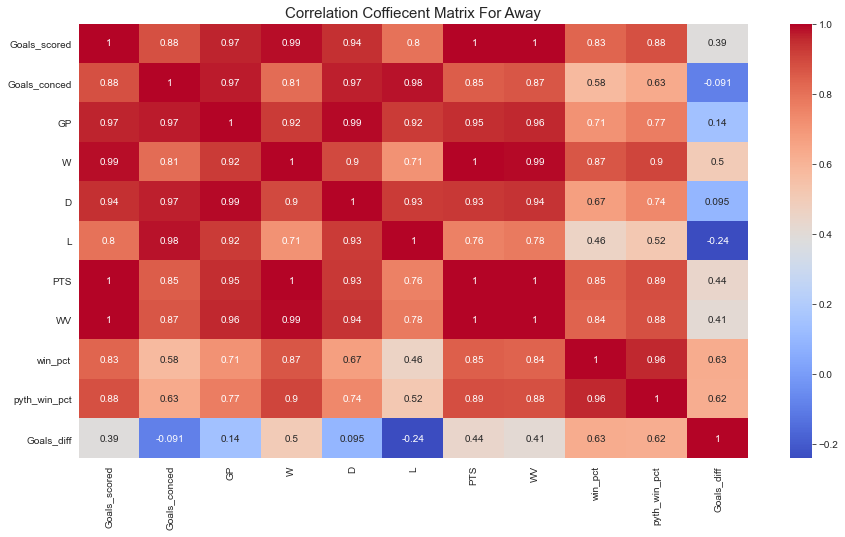

In [90]:
#Correlations
plt.figure(figsize=(15, 8))
sns.heatmap(away.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Coffiecent Matrix For Away', fontsize=15)

Text(0, 0.5, 'Pythogorean Winning Percentage')

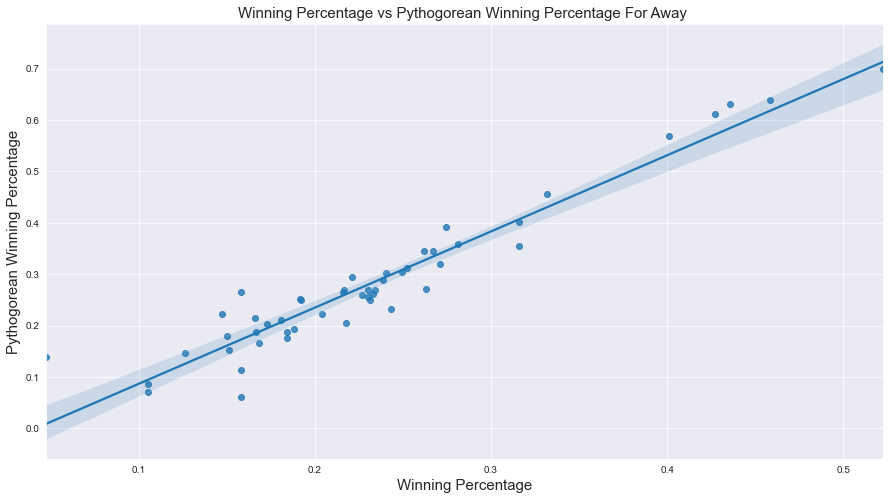

In [91]:
#Regression plot for win percentage vs pythogorean win percentages for away stats
plt.figure(figsize=(15, 8))
sns.regplot(x='win_pct', y='pyth_win_pct', data=away)
plt.title(
    'Winning Percentage vs Pythogorean Winning Percentage For Away ', fontsize=15)
plt.xlabel('Winning Percentage', fontsize=15)
plt.ylabel('Pythogorean Winning Percentage', fontsize=15)


In [92]:
#Top 10 teams with most away wins
away.sort_values(by = ['W'], ascending=False).head(10)

,Team,Goals_scored,Goals_conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
27,Manchester Utd,971,638,576,301,147,128,1050,374.5,0.522569,0.698460,Yes,333
14,Chelsea,852,640,576,264,141,171,933,334.5,0.458333,0.639279,Yes,212
0,Arsenal,863,659,576,251,153,172,906,327.5,0.435764,0.631669,Yes,204
25,Liverpool,865,689,576,246,145,185,883,318.5,0.427083,0.611822,Yes,176
26,Manchester City,701,610,481,193,113,175,692,249.5,0.401247,0.569080,Yes,91
43,Tottenham,750,820,576,191,149,236,722,265.5,0.331597,0.455502,Yes,-70
18,Everton,610,841,576,151,166,259,619,234.0,0.262153,0.344735,Yes,-231
1,Aston Villa,581,776,519,146,145,228,583,218.5,0.281310,0.359208,Yes,-195
29,Newcastle Utd,546,826,517,129,136,252,523,197.0,0.249516,0.304078,Yes,-280
46,West Ham,505,794,498,119,129,250,486,183.5,0.238956,0.288014,Yes,-289


In [93]:
# Top 10 teams with most away goals
away.sort_values(by=['Goals_scored'], ascending=False).head(10)


,Team,Goals_scored,Goals_conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
27,Manchester Utd,971,638,576,301,147,128,1050,374.5,0.522569,0.698460,Yes,333
25,Liverpool,865,689,576,246,145,185,883,318.5,0.427083,0.611822,Yes,176
0,Arsenal,863,659,576,251,153,172,906,327.5,0.435764,0.631669,Yes,204
14,Chelsea,852,640,576,264,141,171,933,334.5,0.458333,0.639279,Yes,212
43,Tottenham,750,820,576,191,149,236,722,265.5,0.331597,0.455502,Yes,-70
26,Manchester City,701,610,481,193,113,175,692,249.5,0.401247,0.569080,Yes,91
18,Everton,610,841,576,151,166,259,619,234.0,0.262153,0.344735,Yes,-231
1,Aston Villa,581,776,519,146,145,228,583,218.5,0.281310,0.359208,Yes,-195
29,Newcastle Utd,546,826,517,129,136,252,523,197.0,0.249516,0.304078,Yes,-280
46,West Ham,505,794,498,119,129,250,486,183.5,0.238956,0.288014,Yes,-289


In [94]:
# Top 10 teams with high away win pct
away.sort_values(by=['win_pct'], ascending=False).head(10)


,Team,Goals_scored,Goals_conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
27,Manchester Utd,971,638,576,301,147,128,1050,374.5,0.522569,0.698460,Yes,333
14,Chelsea,852,640,576,264,141,171,933,334.5,0.458333,0.639279,Yes,212
0,Arsenal,863,659,576,251,153,172,906,327.5,0.435764,0.631669,Yes,204
25,Liverpool,865,689,576,246,145,185,883,318.5,0.427083,0.611822,Yes,176
26,Manchester City,701,610,481,193,113,175,692,249.5,0.401247,0.569080,Yes,91
43,Tottenham,750,820,576,191,149,236,722,265.5,0.331597,0.455502,Yes,-70
23,Leeds United,341,416,272,86,70,116,328,121.0,0.316176,0.401888,Yes,-75
9,Brentford,26,35,19,6,4,9,22,8.0,0.315789,0.355602,No,-9
1,Aston Villa,581,776,519,146,145,228,583,218.5,0.281310,0.359208,Yes,-195
24,Leicester City,385,479,306,84,76,146,328,122.0,0.274510,0.392476,Yes,-94


In [95]:
# Top 10 teams with most away goals conced
away.sort_values(by=['Goals_conced'], ascending=False).head(10)

,Team,Goals_scored,Goals_conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
18,Everton,610,841,576,151,166,259,619,234.0,0.262153,0.344735,Yes,-231
29,Newcastle Utd,546,826,517,129,136,252,523,197.0,0.249516,0.304078,Yes,-280
43,Tottenham,750,820,576,191,149,236,722,265.5,0.331597,0.455502,Yes,-70
46,West Ham,505,794,498,119,129,250,486,183.5,0.238956,0.288014,Yes,-289
1,Aston Villa,581,776,519,146,145,228,583,218.5,0.281310,0.359208,Yes,-195
38,Southampton,450,740,443,96,117,230,405,154.5,0.216704,0.269964,Yes,-290
25,Liverpool,865,689,576,246,145,185,883,318.5,0.427083,0.611822,Yes,176
0,Arsenal,863,659,576,251,153,172,906,327.5,0.435764,0.631669,Yes,204
14,Chelsea,852,640,576,264,141,171,933,334.5,0.458333,0.639279,Yes,212
27,Manchester Utd,971,638,576,301,147,128,1050,374.5,0.522569,0.698460,Yes,333


In [96]:
# Top 10 teams with most goals diff
away.sort_values(by=['Goals_diff', 'GP'], ascending=[False, False]).head(10)

,Team,Goals_scored,Goals_conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
27,Manchester Utd,971,638,576,301,147,128,1050,374.5,0.522569,0.698460,Yes,333
14,Chelsea,852,640,576,264,141,171,933,334.5,0.458333,0.639279,Yes,212
0,Arsenal,863,659,576,251,153,172,906,327.5,0.435764,0.631669,Yes,204
25,Liverpool,865,689,576,246,145,185,883,318.5,0.427083,0.611822,Yes,176
26,Manchester City,701,610,481,193,113,175,692,249.5,0.401247,0.569080,Yes,91
9,Brentford,26,35,19,6,4,9,22,8.0,0.315789,0.355602,No,-9
5,Blackpool,25,41,19,5,4,10,19,7.0,0.263158,0.271032,No,-16
42,Swindon Town,22,55,21,1,8,12,11,5.0,0.047619,0.137931,No,-33
2,Barnsley,12,47,19,3,1,15,10,3.5,0.157895,0.061198,No,-35
32,Oldham Athletic,38,79,42,7,9,26,30,11.5,0.166667,0.187899,No,-41


In [97]:
# Top 10 teams with most away loss
away.sort_values(by=['L'], ascending=False).head(15)

,Team,Goals_scored,Goals_conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
18,Everton,610,841,576,151,166,259,619,234.0,0.262153,0.344735,Yes,-231
29,Newcastle Utd,546,826,517,129,136,252,523,197.0,0.249516,0.304078,Yes,-280
46,West Ham,505,794,498,119,129,250,486,183.5,0.238956,0.288014,Yes,-289
43,Tottenham,750,820,576,191,149,236,722,265.5,0.331597,0.455502,Yes,-70
38,Southampton,450,740,443,96,117,230,405,154.5,0.216704,0.269964,Yes,-290
1,Aston Villa,581,776,519,146,145,228,583,218.5,0.281310,0.359208,Yes,-195
25,Liverpool,865,689,576,246,145,185,883,318.5,0.427083,0.611822,Yes,176
40,Sunderland,276,533,304,55,72,177,237,91.0,0.180921,0.211444,Yes,-257
26,Manchester City,701,610,481,193,113,175,692,249.5,0.401247,0.569080,Yes,91
0,Arsenal,863,659,576,251,153,172,906,327.5,0.435764,0.631669,Yes,204


In [98]:
# Top 10 teams with most away draw
away.sort_values(by=['D'], ascending=False).head(10)

,Team,Goals_scored,Goals_conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
18,Everton,610,841,576,151,166,259,619,234.0,0.262153,0.344735,Yes,-231
0,Arsenal,863,659,576,251,153,172,906,327.5,0.435764,0.631669,Yes,204
43,Tottenham,750,820,576,191,149,236,722,265.5,0.331597,0.455502,Yes,-70
27,Manchester Utd,971,638,576,301,147,128,1050,374.5,0.522569,0.698460,Yes,333
1,Aston Villa,581,776,519,146,145,228,583,218.5,0.281310,0.359208,Yes,-195
25,Liverpool,865,689,576,246,145,185,883,318.5,0.427083,0.611822,Yes,176
14,Chelsea,852,640,576,264,141,171,933,334.5,0.458333,0.639279,Yes,212
29,Newcastle Utd,546,826,517,129,136,252,523,197.0,0.249516,0.304078,Yes,-280
46,West Ham,505,794,498,119,129,250,486,183.5,0.238956,0.288014,Yes,-289
38,Southampton,450,740,443,96,117,230,405,154.5,0.216704,0.269964,Yes,-290


In [99]:
# Top 10 teams with most away win values (Combination of wins and draws (1 - for 0.5 for draw))
away.sort_values(by=['WV'], ascending=False).head(10)

,Team,Goals_scored,Goals_conced,GP,W,D,L,PTS,WV,win_pct,pyth_win_pct,Long,Goals_diff
27,Manchester Utd,971,638,576,301,147,128,1050,374.5,0.522569,0.698460,Yes,333
14,Chelsea,852,640,576,264,141,171,933,334.5,0.458333,0.639279,Yes,212
0,Arsenal,863,659,576,251,153,172,906,327.5,0.435764,0.631669,Yes,204
25,Liverpool,865,689,576,246,145,185,883,318.5,0.427083,0.611822,Yes,176
43,Tottenham,750,820,576,191,149,236,722,265.5,0.331597,0.455502,Yes,-70
26,Manchester City,701,610,481,193,113,175,692,249.5,0.401247,0.569080,Yes,91
18,Everton,610,841,576,151,166,259,619,234.0,0.262153,0.344735,Yes,-231
1,Aston Villa,581,776,519,146,145,228,583,218.5,0.281310,0.359208,Yes,-195
29,Newcastle Utd,546,826,517,129,136,252,523,197.0,0.249516,0.304078,Yes,-280
46,West Ham,505,794,498,119,129,250,486,183.5,0.238956,0.288014,Yes,-289


In [100]:
#Creating a dataframe to hold some more relevant data for teams in home and in away
EPL = pd.DataFrame()
EPL['Teams'] = home['Team']
EPL['Long'] = home['Long']
EPL['H_win_pct'] = home['win_pct']
EPL['H_pyth'] = home['pyth_win_pct']
EPL['A_win_pct'] = away['win_pct']
EPL['A_pyth'] = away['pyth_win_pct']
display(EPL[0:10])

,Teams,Long,H_win_pct,H_pyth,A_win_pct,A_pyth
0,Arsenal,Yes,0.638889,0.847775,0.435764,0.631669
1,Aston Villa,Yes,0.400771,0.584247,0.281310,0.359208
2,Barnsley,No,0.368421,0.337838,0.157895,0.061198
3,Birmingham City,No,0.375940,0.572463,0.172932,0.202912
4,Blackburn,Yes,0.485632,0.671720,0.267241,0.345301
5,Blackpool,No,0.263158,0.396651,0.263158,0.271032
6,Bolton,No,0.376518,0.509493,0.226721,0.259898
7,Bournemouth,No,0.357895,0.457822,0.231579,0.249723
8,Bradford City,No,0.263158,0.386131,0.105263,0.070308
9,Brentford,No,0.368421,0.523243,0.315789,0.355602


Text(0, 0.5, 'Win Percentage (Away)')

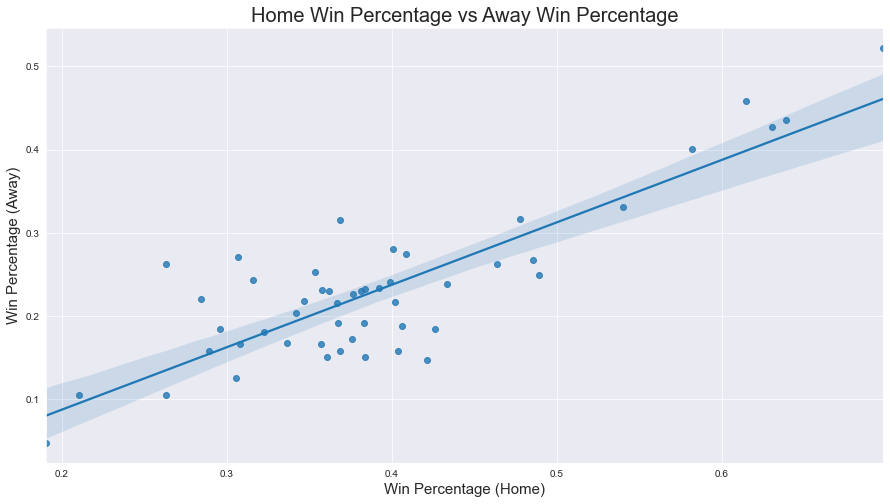

In [101]:
#Regression plot for win percentage for both home and away
plt.figure(figsize = (15, 8))
sns.regplot(x = 'H_win_pct', y = 'A_win_pct', data = EPL)
plt.title('Home Win Percentage vs Away Win Percentage', fontsize=20)
plt.xlabel('Win Percentage (Home)', fontsize=15)
plt.ylabel('Win Percentage (Away)', fontsize=15)

Text(10.655381944444443, 0.5, 'Home Pyth Win Percentage')

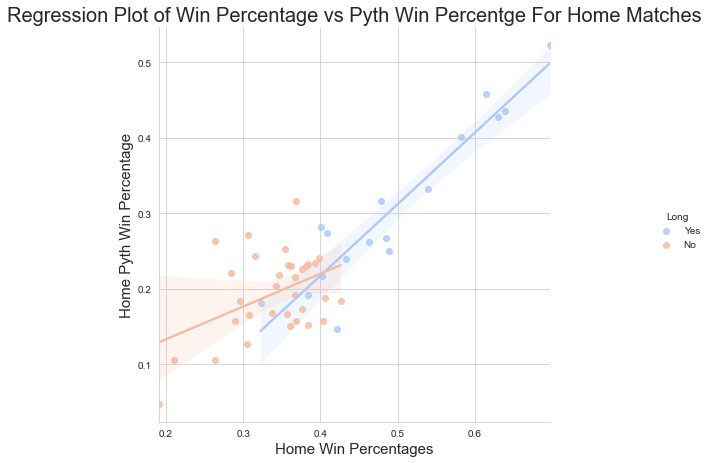

In [115]:
#Regression plot for win percentage for both home and away, for teams with more games played and less games played
sns.set_style('whitegrid')
sns.lmplot(x = 'H_win_pct', y = 'A_win_pct', data = EPL, hue = 'Long', palette = 'coolwarm', height = 6, aspect = 1, fit_reg = True)
plt.title('Regression Plot of Win Percentage vs Pyth Win Percentge For Home Matches', fontsize = 20)
plt.xlabel('Home Win Percentages', fontsize = 15)
plt.ylabel("Home Pyth Win Percentage", fontsize = 15)

Text(10.655381944444443, 0.5, 'Away Pyth Win Percentage')

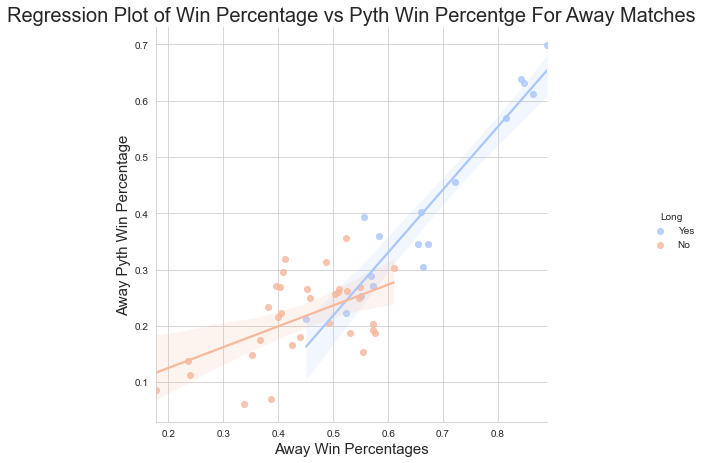

In [103]:
#Regression plot for pythogorean win percentage for both home and away, for teams with more games played and less games played
sns.set_style('whitegrid')
sns.lmplot(x = 'H_pyth', y = 'A_pyth', data = EPL, hue = 'Long', palette = 'coolwarm', height = 6, aspect = 1, fit_reg = True)
plt.title('Regression Plot of Win Percentage vs Pyth Win Percentge For Away Matches', fontsize=20)
plt.xlabel('Away Win Percentages', fontsize = 15)
plt.ylabel("Away Pyth Win Percentage", fontsize = 15)

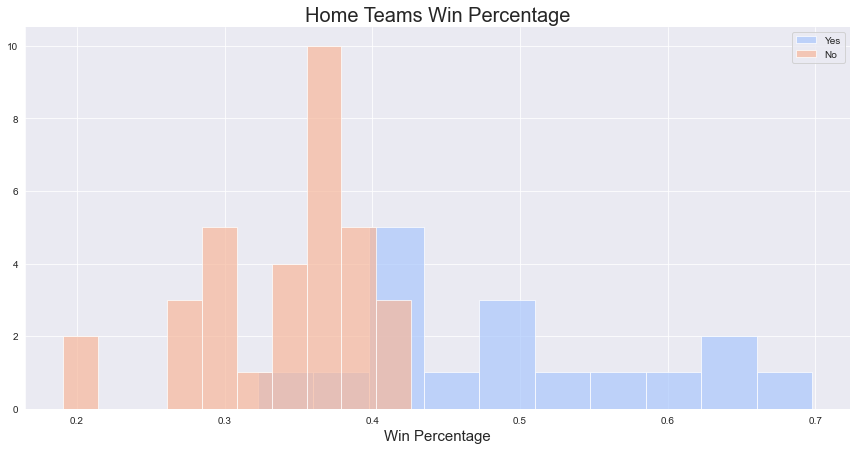

In [104]:
#Histogram for Home win percentages
sns.set_style('darkgrid')
g = sns.FacetGrid(EPL, hue = 'Long', palette = 'coolwarm', height = 6, aspect = 2)
g = g.map(plt.hist, 'H_win_pct', alpha = 0.7)
plt.title('Home Teams Win Percentage', fontsize = 20)
plt.xlabel('Win Percentage', fontsize = 15)
plt.legend()

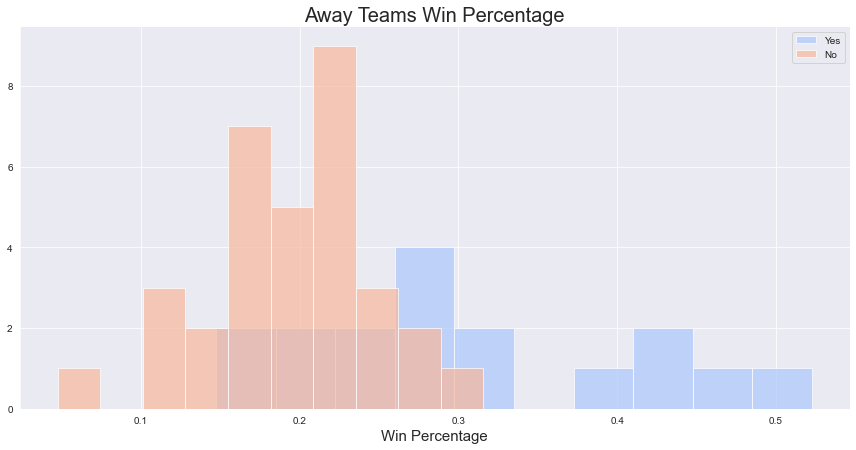

In [105]:
#Histogram for Home win percentages
sns.set_style('darkgrid')
g = sns.FacetGrid(EPL, hue = 'Long', palette = 'coolwarm', height = 6, aspect = 2)
g = g.map(plt.hist, 'A_win_pct', alpha = 0.7)
plt.title('Away Teams Win Percentage', fontsize = 20)
plt.xlabel('Win Percentage', fontsize = 15)
plt.legend()

In [106]:
import statsmodels.formula.api as smf 
#Home win percentage  and home pythogoreon win percentage
reg1 = smf.ols(formula = 'H_win_pct ~ H_pyth', data = EPL).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              H_win_pct   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     445.7
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           6.13e-26
Time:                        22:41:32   Log-Likelihood:                 100.47
No. Observations:                  50   AIC:                            -196.9
Df Residuals:                      48   BIC:                            -193.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0606      0.016      3.691      0.001       0.028       0.094
H_pyth         0.6344      0.030     21.111      0.000       0.574       0.695
==============================================================================
Omnibus:                        6.666   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                5.741
Skew:                           0.799   Prob(JB):                       0.0567
Kurtosis:                       3.446   Cond. No.                         8.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
#Home win percentage  and away win percentage
reg2 = smf.ols(formula='H_win_pct ~ A_win_pct', data=EPL).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              H_win_pct   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     124.2
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           6.44e-15
Time:                        22:41:32   Log-Likelihood:                 74.140
No. Observations:                  50   AIC:                            -144.3
Df Residuals:                      48   BIC:                            -140.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1693      0.022      7.853      0.000       0.126       0.213
A_win_pct      0.9619      0.086     11.146      0.000       0.788       1.135
==============================================================================
Omnibus:                        4.311   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                3.307
Skew:                          -0.600   Prob(JB):                        0.191
Kurtosis:                       3.387   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
#Home win percentage  and home pythogoreon win percentage plus using 'Long' variable
reg3 = smf.ols(formula='H_win_pct ~ H_pyth + C(Long)', data=EPL).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              H_win_pct   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     227.3
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           6.88e-25
Time:                        22:41:32   Log-Likelihood:                 101.39
No. Observations:                  50   AIC:                            -196.8
Df Residuals:                      47   BIC:                            -191.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0741      0.019      3.859      0.000       0.035       0.113
C(Long)[T.Yes]     0.0179      0.013      1.327      0.191      -0.009       0.045
H_pyth             0.5971      0.041     14.558      0.000       0.515       0.680
==============================================================================
Omnibus:                        7.463   Durbin-Watson:                   2.283
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.590
Skew:                           0.852   Prob(JB):                       0.0371
Kurtosis:                       3.507   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
#Home win percentage, home pythogoreon win percentage and away win percentage
reg4 = smf.ols(formula='H_win_pct ~ H_pyth+ A_win_pct', data=EPL).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              H_win_pct   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     250.6
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           8.53e-26
Time:                        22:41:32   Log-Likelihood:                 103.61
No. Observations:                  50   AIC:                            -201.2
Df Residuals:                      47   BIC:                            -195.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0659      0.016      4.190      0.000       0.034       0.098
H_pyth         0.5275      0.051     10.283      0.000       0.424       0.631
A_win_pct      0.2182      0.087      2.508      0.016       0.043       0.393
==============================================================================
Omnibus:                        4.469   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                3.353
Skew:                           0.568   Prob(JB):                        0.187
Kurtosis:                       3.563   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
#Home win percentage, home pythogoreon win percentage, away win percentage and away pythogorean
reg5 = smf.ols(formula='H_win_pct ~ H_pyth+ A_win_pct+A_pyth', data=EPL).fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              H_win_pct   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           1.51e-24
Time:                        22:41:32   Log-Likelihood:                 103.63
No. Observations:                  50   AIC:                            -199.3
Df Residuals:                      46   BIC:                            -191.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0682      0.020      3.400      0.001       0.028       0.109
H_pyth         0.5231      0.057      9.186      0.000       0.408       0.638
A_win_pct      0.1903      0.174      1.097      0.278      -0.159       0.540
A_pyth         0.0230      0.123      0.187      0.853      -0.225       0.271
==============================================================================
Omnibus:                        4.988   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.841
Skew:                           0.593   Prob(JB):                        0.147
Kurtosis:                       3.661   Cond. No.                         54.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
#Home win percentage, home pythogoreon win percentage, away win percentage and treating each team as a unique entity
reg6 = smf.ols(formula='H_win_pct ~ H_pyth+ A_win_pct + C(Long)', data=EPL).fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              H_win_pct   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     170.7
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           6.15e-25
Time:                        22:41:33   Log-Likelihood:                 104.60
No. Observations:                  50   AIC:                            -201.2
Df Residuals:                      46   BIC:                            -193.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0790      0.018      4.317      0.000       0.042       0.116
C(Long)[T.Yes]     0.0175      0.013      1.367      0.178      -0.008       0.043
H_pyth             0.4918      0.057      8.605      0.000       0.377       0.607
A_win_pct          0.2167      0.086      2.513      0.016       0.043       0.390
==============================================================================
Omnibus:                        4.967   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.821
Skew:                           0.593   Prob(JB):                        0.148
Kurtosis:                       3.653   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
#Home win percentage, home pythogoreon win percentage, away win percentage and (home pythogorean and away win percentages)
reg7 = smf.ols(formula='H_win_pct ~ H_pyth+A_win_pct+H_pyth*A_win_pct', data=EPL).fit()
reg7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              H_win_pct   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     207.3
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           1.00e-26
Time:                        22:41:33   Log-Likelihood:                 109.09
No. Observations:                  50   AIC:                            -210.2
Df Residuals:                      46   BIC:                            -202.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1638      0.032      5.047      0.000       0.098       0.229
H_pyth               0.3775      0.064      5.858      0.000       0.248       0.507
A_win_pct           -0.2684      0.165     -1.627      0.111      -0.600       0.064
H_pyth:A_win_pct     0.7013      0.209      3.357      0.002       0.281       1.122
==============================================================================
Omnibus:                        4.540   Durbin-Watson:                   2.278
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                3.426
Skew:                           0.515   Prob(JB):                        0.180
Kurtosis:                       3.765   Cond. No.                         76.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
#Home win percentage, home pythogoreon win percentage and away win percentage
reg7 = smf.ols(formula='A_win_pct ~ A_pyth+ H_win_pct', data=EPL).fit()
reg7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              A_win_pct   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     276.4
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           1.02e-26
Time:                        22:58:54   Log-Likelihood:                 112.09
No. Observations:                  50   AIC:                            -218.2
Df Residuals:                      47   BIC:                            -212.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0443      0.018      2.521      0.015       0.009       0.080
A_pyth         0.5837      0.053     10.962      0.000       0.477       0.691
H_win_pct      0.0584      0.073      0.804      0.425      -0.088       0.205
==============================================================================
Omnibus:                       10.860   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               14.056
Skew:                          -0.718   Prob(JB):                     0.000887
Kurtosis:                       5.164   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusions

The regression plots shows a very good relationship for teams who have played more than 460 games in the top flight league as comapred to the once with fewer games than 460. This show the win percentage and the pythogorean win percentage gives a perfect regression line for teams with more games.

From the regression results, the home and away win percentage is better determined by the combination of pythogorean win percentage, win percentages for both home and away stats. in Home win percentage regression, the R-squared and the Adjusted r-squared are 0.914 and 0.911 respectively and for the away win percentage 0.931 and 0.927 for R-squared and Adjusted R-squared respectively.